In [56]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, fixed
%matplotlib inline

# Globals
IMG_PATH = 'photos/' 
IMG_NAMES = os.listdir(IMG_PATH)

def adaptive_threshold(index=0):
    path = IMG_PATH + IMG_NAMES[index]
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.medianBlur(img,5)

    ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
    th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

    titles = ['Original Image', 'Global Thresholding (v = 127)',
                'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
    images = [img, th1, th2, th3]

    plt.figure(figsize=(8,6))
    for i in xrange(4):
        plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
    plt.show()
    
def otsu_binarization(index=0):
    path = IMG_PATH + IMG_NAMES[index]
    img = cv2.imread(path, 0)
    
    # global thresholding
    ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

    # Otsu's thresholding
    ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    # Otsu's thresholding after Gaussian filtering
    blur = cv2.GaussianBlur(img,(5,5),0)
    ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    # plot all the images and their histograms
    images = [img, 0, th1,
              img, 0, th2,
              blur, 0, th3]
    titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
              'Original Noisy Image','Histogram',"Otsu's Thresholding",
              'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
    
    plt.figure(figsize=(16,6))
    for i in xrange(3):
        plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
        plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
        plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
        plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
        plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
        plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
    plt.show()

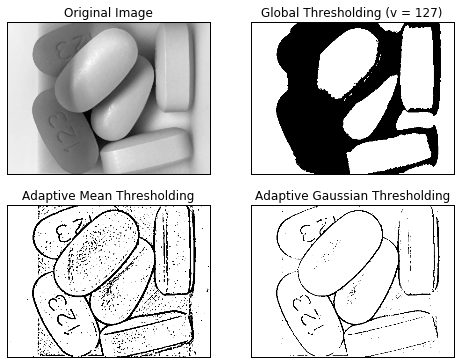

In [53]:
interact(adaptive_threshold, index=(0, len(IMG_NAMES) - 1));

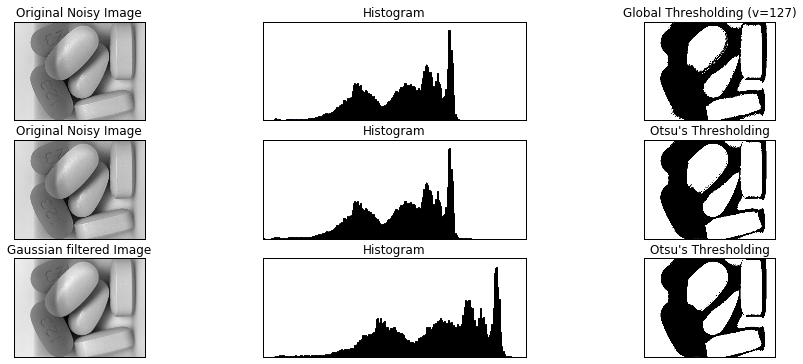

In [57]:
interact(otsu_binarization, index=(0, len(IMG_NAMES) - 1));